In [0]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline
import re

In [2]:
!pip install cmapPy

     |████████████████████████████████| 153kB 4.8MB/s 


In [112]:
!pip install gsva

In [0]:
import cmapPy
from cmapPy.pandasGEXpress.parse import parse

In [0]:
# Reading expressional and metadata
Gene_Exp = parse("/content/drive/My Drive/Copy of PAAD.gct",).data_df               #expressional data
Gene_Info = parse('/content/drive/My Drive/Copy of PAAD.gct',col_meta_only=True)     #informational data

In [66]:
# visualizing gene expressional data
Gene_Exp.head()

cid,aab1-Primary solid Tumor,aab4-Primary solid Tumor,aab6-Primary solid Tumor,aab8-Primary solid Tumor,aab9-Primary solid Tumor,aaba-Primary solid Tumor,aabe-Primary solid Tumor,aabf-Primary solid Tumor,aabh-Primary solid Tumor,aabi-Primary solid Tumor,aabk-Primary solid Tumor,aabo-Primary solid Tumor,aabp-Primary solid Tumor,aabr-Primary solid Tumor,aabt-Primary solid Tumor,aabu-Primary solid Tumor,aabv-Primary solid Tumor,aaqa-Primary solid Tumor,aaqe-Primary solid Tumor,aaqi-Primary solid Tumor,aaqj-Primary solid Tumor,aaql-Primary solid Tumor,aaqm-Primary solid Tumor,a9i5-Primary solid Tumor,a9i7-Primary solid Tumor,a9i9-Primary solid Tumor,a9ib-Primary solid Tumor,a9ic-Primary solid Tumor,a9ih-Primary solid Tumor,a9ij-Primary solid Tumor,a9il-Primary solid Tumor,a9in-Primary solid Tumor,a9io-Primary solid Tumor,a9ir-Primary solid Tumor,a9is-Primary solid Tumor,a9iu-Primary solid Tumor,a9iv-Primary solid Tumor,a9ix-Primary solid Tumor,a9iz-Primary solid Tumor,a9j0-Primary solid Tumor,...,aaup-Primary solid Tumor,aauq-Primary solid Tumor,aaur-Primary solid Tumor,aaus-Primary solid Tumor,aaut-Primary solid Tumor,aauu-Primary solid Tumor,aauv-Primary solid Tumor,aauw-Primary solid Tumor,a7w4-Primary solid Tumor,a7sx-Primary solid Tumor,a8f3-Primary solid Tumor,a9q5-Primary solid Tumor,a5n4-Primary solid Tumor,a75w-Primary solid Tumor,a5re-Primary solid Tumor,a5qy-Primary solid Tumor,aa2a-Primary solid Tumor,a7b8-Primary solid Tumor,aa9m-Primary solid Tumor,aaas-Primary solid Tumor,a8rm-Primary solid Tumor,a8ro-Primary solid Tumor,a8rp-Primary solid Tumor,a774-Primary solid Tumor,a776-Primary solid Tumor,a779-Primary solid Tumor,a77e-Primary solid Tumor,a77g-Primary solid Tumor,a77j-Primary solid Tumor,aaug-Primary solid Tumor,aauh-Primary solid Tumor,aaui-Primary solid Tumor,aaul-Primary solid Tumor,a8t3-Primary solid Tumor,a8t5-Primary solid Tumor,a89d-Solid Tissue Normal,a89d-Primary solid Tumor,a8sy-Primary solid Tumor,a8lh-Primary solid Tumor,aapl-Primary solid Tumor
rid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A1BG,6.4,5.8,6.4,5.8,6.7,6.6,6.3,6.5,5.7,6.3,6.8,5.9,5.7,6.7,5.4,5.8,6.7,6.0,7.0,5.7,6.5,7.8,10.0,7.3,6.1,7.2,6.5,7.1,6.5,9.3,9.5,9.7,8.6,8.0,8.5,6.2,9.0,6.7,5.3,5.1,...,6.8,7.2,7.5,7.8,7.4,5.9,7.7,6.3,7.1,6.0,6.3,6.7,5.2,8.1,7.2,8.1,6.2,7.4,6.6,7.6,5.3,6.3,6.9,6.9,4.7,6.5,6.7,5.2,8.0,7.6,7.1,7.1,6.7,7.0,6.9,7.1,7.3,7.9,6.0,6.9
A1CF,4.7,5.7,3.0,5.1,4.4,4.2,1.6,6.8,6.0,NaN,6.9,4.6,NaN,6.2,4.5,3.1,5.7,5.3,1.2,4.7,4.2,5.2,5.6,7.5,7.4,5.2,5.6,1.3,2.1,6.9,7.2,6.6,8.3,7.0,8.5,3.1,8.2,5.2,2.7,2.2,...,4.5,5.9,2.9,3.1,6.9,6.9,4.6,6.5,-1.2,0.9,7.0,6.0,4.2,5.4,5.3,1.1,6.2,5.8,6.7,4.9,7.2,4.4,6.4,4.8,7.0,6.4,6.0,5.3,5.6,5.4,5.4,6.4,6.5,4.4,3.3,3.6,6.2,1.2,4.9,2.0
A2BP1,-1.0,1.1,NaN,NaN,0.1,NaN,NaN,1.7,0.4,-1.5,1.6,0.7,-0.9,0.3,1.3,NaN,NaN,NaN,-0.1,1.3,NaN,NaN,NaN,0.3,1.1,1.5,NaN,1.0,-0.4,3.6,NaN,-0.8,-1.0,NaN,NaN,0.4,NaN,-1.3,NaN,NaN,...,NaN,0.4,-0.1,-1.0,3.7,1.8,-0.3,1.5,-1.2,NaN,0.0,-0.1,NaN,NaN,NaN,NaN,-0.5,-0.7,-1.2,0.1,0.7,-1.0,-0.9,NaN,6.6,0.6,0.4,-1.1,-0.7,1.0,3.5,1.3,-0.3,NaN,2.1,2.0,0.0,NaN,2.0,NaN
A2LD1,7.5,6.8,7.3,7.5,7.4,6.6,7.1,6.8,8.0,5.8,7.1,7.7,6.4,6.5,6.9,6.0,8.2,8.4,6.4,7.1,6.4,8.1,6.6,7.7,7.1,7.5,6.0,6.5,7.3,6.3,6.7,5.5,6.4,5.5,3.8,6.6,4.4,7.0,6.8,6.8,...,6.6,6.8,6.8,6.7,6.7,6.2,6.8,7.2,5.3,7.3,8.2,7.7,6.6,8.0,7.5,6.9,6.4,7.0,6.7,7.3,7.5,6.8,7.0,7.1,6.7,7.4,7.1,7.4,6.8,6.1,6.5,7.3,6.1,6.7,6.5,6.7,6.7,6.5,6.9,6.7
A2ML1,6.4,NaN,10.8,4.1,9.3,9.8,6.2,3.8,2.3,10.1,2.7,8.0,NaN,5.5,NaN,9.8,NaN,1.7,7.5,11.5,1.0,1.0,NaN,-0.7,9.3,NaN,0.7,2.7,8.4,0.1,-0.9,NaN,NaN,NaN,-1.1,11.6,NaN,6.0,9.9,3.1,...,3.5,5.6,-0.1,6.6,-0.7,1.9,1.3,0.7,8.0,9.2,1.3,5.1,2.7,-1.0,5.7,5.4,-0.5,3.0,7.8,-0.9,1.1,3.7,-0.9,8.4,NaN,4.6,5.7,NaN,-0.7,3.4,0.1,3.4,3.7,-0.9,3.6,1.0,2.8,10.5,3.1,5.1


In [67]:
Gene_Exp.shape

(18465, 183)

In [68]:
# Describing data and checking standard deviation of the data.
Gene_Exp.describe()

cid,aab1-Primary solid Tumor,aab4-Primary solid Tumor,aab6-Primary solid Tumor,aab8-Primary solid Tumor,aab9-Primary solid Tumor,aaba-Primary solid Tumor,aabe-Primary solid Tumor,aabf-Primary solid Tumor,aabh-Primary solid Tumor,aabi-Primary solid Tumor,aabk-Primary solid Tumor,aabo-Primary solid Tumor,aabp-Primary solid Tumor,aabr-Primary solid Tumor,aabt-Primary solid Tumor,aabu-Primary solid Tumor,aabv-Primary solid Tumor,aaqa-Primary solid Tumor,aaqe-Primary solid Tumor,aaqi-Primary solid Tumor,aaqj-Primary solid Tumor,aaql-Primary solid Tumor,aaqm-Primary solid Tumor,a9i5-Primary solid Tumor,a9i7-Primary solid Tumor,a9i9-Primary solid Tumor,a9ib-Primary solid Tumor,a9ic-Primary solid Tumor,a9ih-Primary solid Tumor,a9ij-Primary solid Tumor,a9il-Primary solid Tumor,a9in-Primary solid Tumor,a9io-Primary solid Tumor,a9ir-Primary solid Tumor,a9is-Primary solid Tumor,a9iu-Primary solid Tumor,a9iv-Primary solid Tumor,a9ix-Primary solid Tumor,a9iz-Primary solid Tumor,a9j0-Primary solid Tumor,...,aaup-Primary solid Tumor,aauq-Primary solid Tumor,aaur-Primary solid Tumor,aaus-Primary solid Tumor,aaut-Primary solid Tumor,aauu-Primary solid Tumor,aauv-Primary solid Tumor,aauw-Primary solid Tumor,a7w4-Primary solid Tumor,a7sx-Primary solid Tumor,a8f3-Primary solid Tumor,a9q5-Primary solid Tumor,a5n4-Primary solid Tumor,a75w-Primary solid Tumor,a5re-Primary solid Tumor,a5qy-Primary solid Tumor,aa2a-Primary solid Tumor,a7b8-Primary solid Tumor,aa9m-Primary solid Tumor,aaas-Primary solid Tumor,a8rm-Primary solid Tumor,a8ro-Primary solid Tumor,a8rp-Primary solid Tumor,a774-Primary solid Tumor,a776-Primary solid Tumor,a779-Primary solid Tumor,a77e-Primary solid Tumor,a77g-Primary solid Tumor,a77j-Primary solid Tumor,aaug-Primary solid Tumor,aauh-Primary solid Tumor,aaui-Primary solid Tumor,aaul-Primary solid Tumor,a8t3-Primary solid Tumor,a8t5-Primary solid Tumor,a89d-Solid Tissue Normal,a89d-Primary solid Tumor,a8sy-Primary solid Tumor,a8lh-Primary solid Tumor,aapl-Primary solid Tumor
count,17820.000000,17933.000000,17482.000000,17451.000000,17504.000000,17671.000000,17708.000000,18142.000000,17882.000000,17662.000000,18057.000000,17674.000000,17292.000000,17869.000000,17634.000000,17239.000000,17087.000000,17737.000000,17684.000000,17894.000000,17666.000000,17705.000000,17349.000000,17718.000000,18023.000000,17896.000000,17875.000000,17738.000000,17959.000000,17232.000000,17619.000000,17763.000000,17452.000000,17131.000000,16820.000000,17820.000000,17257.000000,18034.000000,17373.000000,17597.000000,...,18019.000000,17851.000000,17974.000000,17867.000000,17839.000000,17949.000000,17991.000000,18092.000000,17547.000000,17961.000000,17623.000000,17563.000000,17302.000000,17619.000000,17808.000000,17817.000000,17440.000000,17788.000000,17988.000000,17815.000000,17782.000000,17755.000000,17998.000000,17959.000000,17375.000000,17714.000000,17762.000000,17755.000000,17822.000000,17858.000000,17778.000000,18008.000000,17845.000000,17886.000000,17839.000000,17884.000000,17872.000000,17636.000000,17766.000000,17531.000000
mean,7.600350,7.640027,7.577272,7.728910,7.796232,7.664258,7.628768,7.698296,7.556487,7.431445,7.713098,7.736519,7.467468,7.720989,7.688799,7.676816,7.795526,7.470368,7.507166,7.646086,7.480559,7.653113,7.570036,7.647937,7.682369,7.719568,7.528366,7.599249,7.533817,7.517242,7.691775,7.812677,7.508875,7.334723,7.412479,7.496696,7.586169,7.738194,7.601067,7.545671,...,7.691676,7.772751,7.679150,7.631844,7.707471,7.550127,7.656855,7.725448,7.413929,7.584236,7.507124,7.788795,7.564245,7.566792,7.539202,7.633813,7.625263,7.675437,7.656375,7.724747,7.465450,7.539163,7.697048,7.640117,7.366955,7.512592,7.509237,7.449837,7.759956,7.779565,7.780545,7.692076,7.576006,7.685815,7.733063,7.597840,7.657292,7.541137,7.432003,7.660249
std,3.387377,3.334094,3.388896,3.184404,3.139387,3.282393,3.324884,3.290496,3.436970,3.562189,3.247404,3.204877,3.528965,3.245350,3.275044,3.217194,3.143683,3.511328,3.458356,3.341027,3.510739,3.325012,3.406467,3.

In [69]:
Gene_Exp.columns

Index(['aab1-Primary solid Tumor', 'aab4-Primary solid Tumor',
       'aab6-Primary solid Tumor', 'aab8-Primary solid Tumor',
       'aab9-Primary solid Tumor', 'aaba-Primary solid Tumor',
       'aabe-Primary solid Tumor', 'aabf-Primary solid Tumor',
       'aabh-Primary solid Tumor', 'aabi-Primary solid Tumor',
       ...
       'aauh-Primary solid Tumor', 'aaui-Primary solid Tumor',
       'aaul-Primary solid Tumor', 'a8t3-Primary solid Tumor',
       'a8t5-Primary solid Tumor', 'a89d-Solid Tissue Normal',
       'a89d-Primary solid Tumor', 'a8sy-Primary solid Tumor',
       'a8lh-Primary solid Tumor', 'aapl-Primary solid Tumor'],
      dtype='object', name='cid', length=183)

In [70]:
# visualizing gene expressional data
Gene_Info.head()

chd,participant_id,sample_type,mRNAseq_cluster,bcr_patient_barcode,bcr_patient_uuid,vital_status,days_to_death,days_to_last_followup,additional_studies,adenocarcinoma_invasion,age_at_initial_pathologic_diagnosis,alcohol_history_documented,alcoholic_exposure_category,amount_of_alcohol_consumption_per_day,anatomic_neoplasm_subdivision,anatomic_neoplasm_subdivision_other,b_symptoms,bcr,bcr_aliquot_uuid,bcr_canonical_reason-2,bcr_canonical_reason-3,bcr_canonical_reason,bcr_followup_barcode,bcr_followup_uuid,bcr_patient_canonical_status,clinical_m,clinical_n,clinical_stage,clinical_t,course_number,day_of_dcc_upload,day_of_form_completion,days_to_birth,days_to_diabetes_onset,days_to_index,days_to_initial_pathologic_diagnosis,days_to_pancreatitis_onset,days_to_psa,disease_code,drugs,...,person_neoplasm_cancer_status,prescribed_dose,prescribed_dose_units,primary_lymph_node_presentation_assessment,primary_pattern,primary_therapy_outcome_success,progression_determined_by-3,project_code,psa_value,race,radiation_therapy,radiation_type_notes,radiations,regimen_number,relative_cancer_type-2,relative_cancer_type,residual_tumor,route_of_administration,secondary_pattern,serum_markers,source_of_patient_death_reason,stopped_smoking_year,surgery_performed_type,system_version,targeted_molecular_therapy,tertiary_pattern,therapy_type_notes,tissue_prospective_collection_indicator,tissue_retrospective_collection_indicator,tissue_source_site,tobacco_smoking_history,total_dose,total_dose_units,tumor_tissue_site,tumor_type,withdrawn,year_of_dcc_upload,year_of_form_completion,year_of_initial_pathologic_diagnosis,year_of_tobacco_smoking_onset
cid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
aab1-Primary solid Tumor,aab1,Primary solid Tumor,1.0,tcga-2j-aab1,75119d1a-93e5-4ae7-9d60-69ee929a0772,dead,66.0,NaN,NaN,yes,65,yes,weekly drinker,1.0,head of pancreas,NaN,NaN,nationwide children's hospital,d3f960b2-c69d-4b64-a30f-72f4fa7bb2f9,NaN,NaN,NaN,NaN,NaN,canonical,NaN,NaN,NaN,NaN,NaN,21,5,-23962,NaN,0.0,0.0,NaN,NaN,paad,NaN,...,tumor free,NaN,NaN,yes,NaN,complete remission/response,NaN,tcga,NaN,white,no,NaN,NaN,NaN,NaN,NaN,r0,NaN,NaN,NaN,medical record,1988.0,whipple,7,yes,NaN,NaN,no,yes,2j,3.0,NaN,NaN,pancreas,primary,false,2016,2014,2012.0,1962.0
aab4-Primary solid Tumor,aab4,Primary solid Tumor,2.0,tcga-2j-aab4,33833131-1482-42d5-9cf5-01cade540234,alive,NaN,729.0,NaN,yes,48,no,NaN,NaN,other (please specify),body & tail of pancreas,NaN,nationwide children's hospital,9daae9d7-747e-44e0-a8f8-3c3f9e3f03f3,NaN,NaN,NaN,tcga-2j-aab4-f62444,ce0b8128-82b9-4164-808f-1b4447134f54,canonical,NaN,NaN,NaN,NaN,NaN,21,16,-17794,NaN,0.0,0.0,-292.0,NaN,paad,NaN,...,tumor free,NaN,NaN,yes,NaN,complete remission/response,NaN,tcga,NaN,white,no,NaN,NaN,NaN,NaN,NaN,r0,NaN,NaN,NaN,NaN,NaN,distal pancreatectomy,7,yes,NaN,NaN,no,yes,2j,5.0,NaN,NaN,pancreas,primary,false,2016,2014,2012.0,NaN
aab6-Primary solid Tumor,aab6,Primary solid Tumor,3.0,tcga-2j-aab6,70797499-16e6-48cc-8ae4-1e692713dad3,dead,293.0,NaN,NaN,yes,75,no,NaN,NaN,body of pancreas,NaN,NaN,nationwide children's hospital,c850368e-6e95-4879-8245-205ddeec6fbd,NaN,NaN,NaN,NaN,NaN,canonical,NaN,NaN,NaN,NaN,NaN,21,5,-27600,NaN,0.0,0.0,NaN,NaN,paad,NaN,...,with tumor,NaN,NaN,yes,NaN,progressive disease,NaN,tcga,NaN,white,no,NaN,NaN,NaN,NaN,NaN,r0,NaN,NaN,NaN,medical record,NaN,distal pancreatectomy,7,yes,NaN,NaN,no,yes,2j,NaN,NaN,NaN,pancreas,primary,false,2016,2014,2012.0,NaN
aab8-Primary solid Tumor,aab8,Primary solid Tumor,1.0,tcga-2j-aab8,2e8f90f4-aed3-43b0-985c-dfdc2581f24f,alive,NaN,80.0,NaN,yes,71,no,NaN,NaN,head of pancreas,NaN,NaN,nationwide children's hospital,5749429c-5ac9-40de-b44e-3b795520ec07,NaN,NaN,NaN,tcga-2j-aab8-f62434,daf7d897-0ed7-48ec-ae70-080dd8d7d6bd,canonical,NaN,NaN,NaN,NaN,NaN,21,16,-26028,NaN,0.0,0.0,NaN,NaN,paad,NaN,...,tumor free,NaN,NaN,yes,NaN,NaN,NaN,tcga,NaN,white,NaN,NaN,NaN,NaN,NaN,NaN,r1,NaN,NaN,NaN,NaN,NaN,whipple,7,yes,NaN,NaN,no,yes,2j,NaN,NaN,NaN,panc

In [71]:
Gene_Info.shape

(183, 124)

### Removing Nan values

In [72]:
# Checking sum of null values in every columns.
Gene_Exp.isnull().sum()

cid
aab1-Primary solid Tumor     645
aab4-Primary solid Tumor     532
aab6-Primary solid Tumor     983
aab8-Primary solid Tumor    1014
aab9-Primary solid Tumor     961
                            ... 
a89d-Solid Tissue Normal     581
a89d-Primary solid Tumor     593
a8sy-Primary solid Tumor     829
a8lh-Primary solid Tumor     699
aapl-Primary solid Tumor     934
Length: 183, dtype: int64

In [73]:
# Counting Nan values in genes.
count = 0
for i in range(len(Gene_Exp.index)) :
    if Gene_Exp.iloc[i].isnull().sum() > 0:
        count += 1
print(count)

4367


**Ans 1.A : 4367 genes has NANs values.** *italicized text*

In [74]:
# Checking sum of null values in every columns.
x = list(zip(Gene_Exp.isnull().sum()))
for i in range(len(x)):
    print("column",[i], "   " ,x[i])
    

column [0]     (645,)
column [1]     (532,)
column [2]     (983,)
column [3]     (1014,)
column [4]     (961,)
column [5]     (794,)
column [6]     (757,)
column [7]     (323,)
column [8]     (583,)
column [9]     (803,)
column [10]     (408,)
column [11]     (791,)
column [12]     (1173,)
column [13]     (596,)
column [14]     (831,)
column [15]     (1226,)
column [16]     (1378,)
column [17]     (728,)
column [18]     (781,)
column [19]     (571,)
column [20]     (799,)
column [21]     (760,)
column [22]     (1116,)
column [23]     (747,)
column [24]     (442,)
column [25]     (569,)
column [26]     (590,)
column [27]     (727,)
column [28]     (506,)
column [29]     (1233,)
column [30]     (846,)
column [31]     (702,)
column [32]     (1013,)
column [33]     (1334,)
column [34]     (1645,)
column [35]     (645,)
column [36]     (1208,)
column [37]     (431,)
column [38]     (1092,)
column [39]     (868,)
column [40]     (431,)
column [41]     (533,)
column [42]     (827,)
column [43

In [0]:
# Dropping rows which has null values.
Gene_Exp = Gene_Exp.dropna()

In [76]:
# Checking null values.
Gene_Exp.isnull().sum().sum()

0

In [77]:
Gene_Exp.shape

(14098, 183)

In [0]:
#Slicing two informational columns
Gene_Info = Gene_Info[['histological_type_other', 'histological_type']]

In [79]:
Gene_Info.isnull().sum()

chd
histological_type_other    156
histological_type            1
dtype: int64

In [80]:
Gene_Info.head()

chd,histological_type_other,histological_type
cid,,
aab1-Primary solid Tumor,invasive adenocarcinoma,pancreas-adenocarcinoma-other subtype
aab4-Primary solid Tumor,"invasive, well-differentiated",pancreas-adenocarcinoma-other subtype
aab6-Primary solid Tumor,NaN,pancreas-adenocarcinoma ductal type
aab8-Primary solid Tumor,NaN,pancreas-adenocarcinoma ductal type
aab9-Primary solid Tumor,NaN,pancreas-adenocarcinoma ductal type


In [81]:
#filling null values by taking most occurence value for imputing in place of null
print(Gene_Info['histological_type_other'].mode()[0])
Gene_Info['histological_type_other'].fillna(Gene_Info['histological_type_other'].mode()[0], inplace=True)
Gene_Info['histological_type'].fillna(Gene_Info['histological_type'].mode()[0], inplace=True)

adenocarcinoma, nos


In [82]:
Gene_Info.isnull().sum()

chd
histological_type_other    0
histological_type          0
dtype: int64

In [0]:
# taking transpose and changing into actual shape.
Gene_Info = Gene_Info.transpose()

In [84]:
# Visualising the metadata.
Gene_Info.head()

cid,aab1-Primary solid Tumor,aab4-Primary solid Tumor,aab6-Primary solid Tumor,aab8-Primary solid Tumor,aab9-Primary solid Tumor,aaba-Primary solid Tumor,aabe-Primary solid Tumor,aabf-Primary solid Tumor,aabh-Primary solid Tumor,aabi-Primary solid Tumor,aabk-Primary solid Tumor,aabo-Primary solid Tumor,aabp-Primary solid Tumor,aabr-Primary solid Tumor,aabt-Primary solid Tumor,aabu-Primary solid Tumor,aabv-Primary solid Tumor,aaqa-Primary solid Tumor,aaqe-Primary solid Tumor,aaqi-Primary solid Tumor,aaqj-Primary solid Tumor,aaql-Primary solid Tumor,aaqm-Primary solid Tumor,a9i5-Primary solid Tumor,a9i7-Primary solid Tumor,a9i9-Primary solid Tumor,a9ib-Primary solid Tumor,a9ic-Primary solid Tumor,a9ih-Primary solid Tumor,a9ij-Primary solid Tumor,a9il-Primary solid Tumor,a9in-Primary solid Tumor,a9io-Primary solid Tumor,a9ir-Primary solid Tumor,a9is-Primary solid Tumor,a9iu-Primary solid Tumor,a9iv-Primary solid Tumor,a9ix-Primary solid Tumor,a9iz-Primary solid Tumor,a9j0-Primary solid Tumor,...,aaup-Primary solid Tumor,aauq-Primary solid Tumor,aaur-Primary solid Tumor,aaus-Primary solid Tumor,aaut-Primary solid Tumor,aauu-Primary solid Tumor,aauv-Primary solid Tumor,aauw-Primary solid Tumor,a7w4-Primary solid Tumor,a7sx-Primary solid Tumor,a8f3-Primary solid Tumor,a9q5-Primary solid Tumor,a5n4-Primary solid Tumor,a75w-Primary solid Tumor,a5re-Primary solid Tumor,a5qy-Primary solid Tumor,aa2a-Primary solid Tumor,a7b8-Primary solid Tumor,aa9m-Primary solid Tumor,aaas-Primary solid Tumor,a8rm-Primary solid Tumor,a8ro-Primary solid Tumor,a8rp-Primary solid Tumor,a774-Primary solid Tumor,a776-Primary solid Tumor,a779-Primary solid Tumor,a77e-Primary solid Tumor,a77g-Primary solid Tumor,a77j-Primary solid Tumor,aaug-Primary solid Tumor,aauh-Primary solid Tumor,aaui-Primary solid Tumor,aaul-Primary solid Tumor,a8t3-Primary solid Tumor,a8t5-Primary solid Tumor,a89d-Solid Tissue Normal,a89d-Primary solid Tumor,a8sy-Primary solid Tumor,a8lh-Primary solid Tumor,aapl-Primary solid Tumor
chd,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
histological_type_other,invasive adenocarcinoma,"invasive, well-differentiated","adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos",invasive adenocarcinoma,poorly differentiated adenocarcinoma,"adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos",neuroendocrine,"adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos",neuroendocrine carcinoma nos,neuroendocrine carcinoma nos,neuroendocrine carcinoma nos,neuroendocrine carcinoma nos,neuroendocrine carcinoma nos,82463 neuroendocrine carcinoma nos,"adenocarcinoma, nos",neuroendocrine carcinoma,"adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos",...,"adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos",ductal and micropapillary,"adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos",adenocarcinoma- nos,"adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos",moderately differentiated ductal adenocarcinom...,"adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos"
histological_typ

### Visualization of gene expression distribution.

In [85]:
# Counting genes which is having high correlation.
count = 0
a = Gene_Exp.shape[1]
b = Gene_Exp.shape[1]
for i in range(a):
  for j in range(b):
    k = np.corrcoef(Gene_Exp.iloc[:,i], Gene_Exp.iloc[:,j])
    y = k[0][1]
    if ((y > 0.9 or y < -0.9) and i != j):
        count += 1
count

14140

In [0]:
# making correlation matrix
Gene_Exp_corr = Gene_Exp.corr()

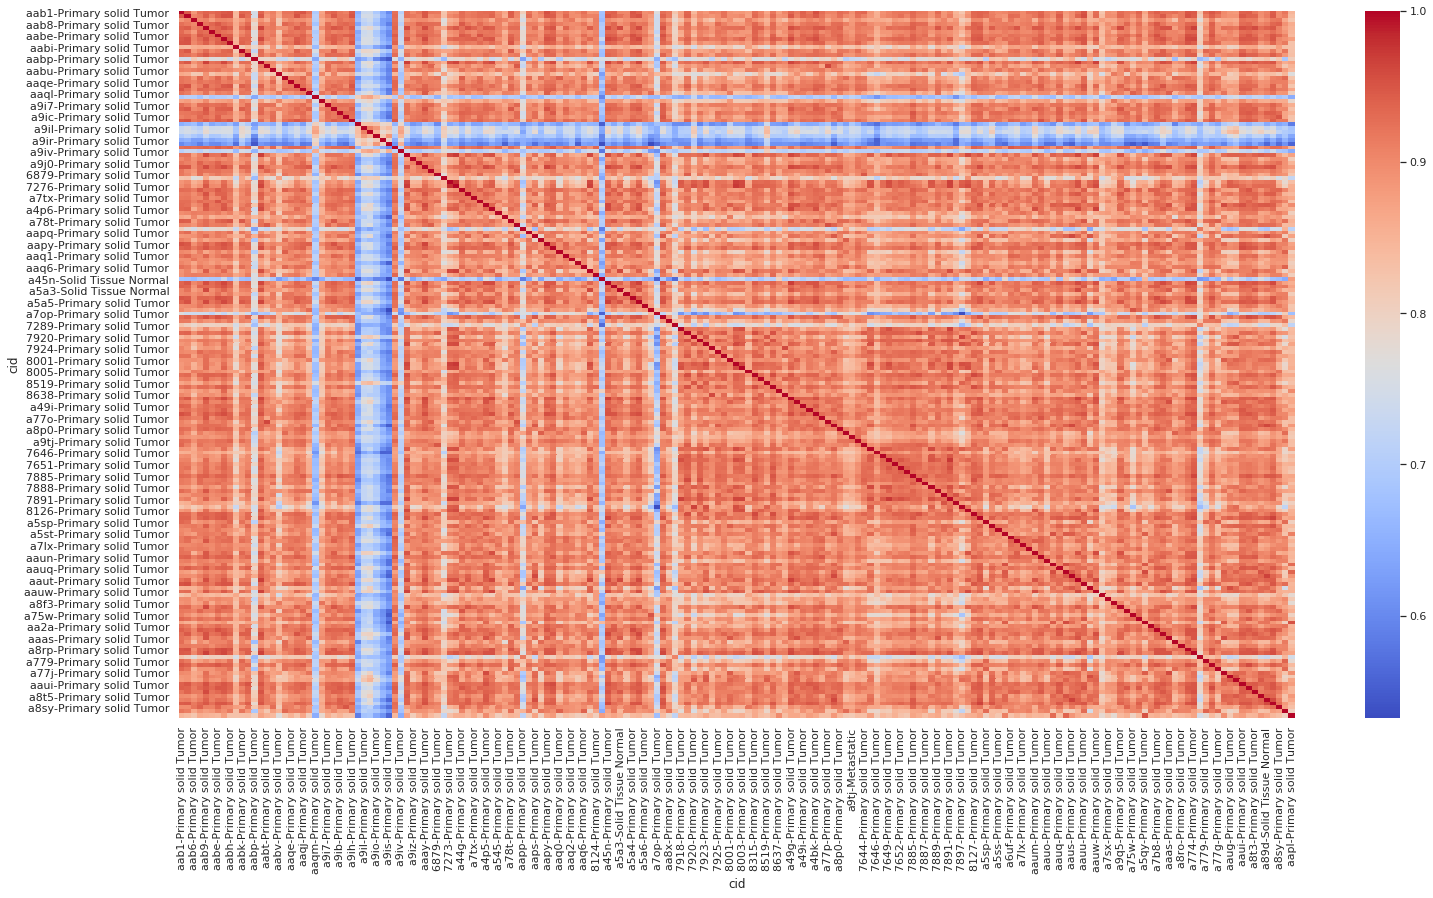

In [87]:
# heatmap of correlation.
fig = plt.figure(figsize=[25,13])
sns.heatmap(data = Gene_Exp_corr, cmap='coolwarm')
plt.show()

#### Since correlation between samples is close to one we can say that all the samples have quite similar gene expression, as correlation between samples act as cosine distance between them

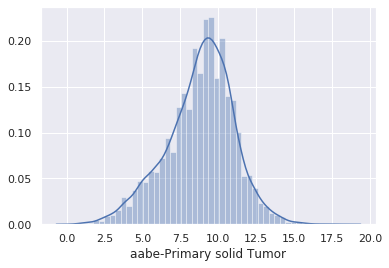

In [88]:
# Checking distribution of the genes.
sns.distplot(Gene_Exp['aabe-Primary solid Tumor'])

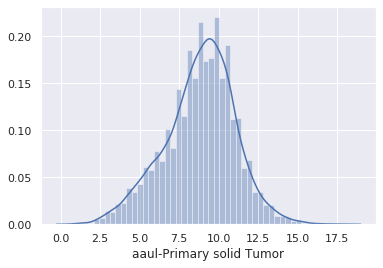

In [89]:
# Checking distribution of the genes.
sns.distplot(Gene_Exp['aaul-Primary solid Tumor'])

**Ans 1.B : Distribution is approximately same across all the samples as the genes are highly correlated**

As all the samples are having high correlation, we can say that they might be having similar distributions.
so checking distributions for 2 genes.

### Applying PCA

In [0]:
# taking transpose of expressional data.
Gene_Exp = Gene_Exp.transpose()

In [0]:
#Feature Scaling and mean normalization
from sklearn import preprocessing

mm_scaler = preprocessing.MinMaxScaler()
Gene_Exp = mm_scaler.fit_transform(Gene_Exp)

In [92]:
# Visualising array data.
Gene_Exp

array([[0.50000006, 0.6727273 , 0.76363635, ..., 0.82222223, 0.5263159 ,
        0.68000007],
       [0.41666675, 0.54545456, 0.7090907 , ..., 0.71111107, 0.44736838,
        0.51999974],
       [0.50000006, 0.6363637 , 0.5454545 , ..., 0.9555557 , 0.44736838,
        0.63999987],
       ...,
       [0.70833343, 0.49090916, 0.5272727 , ..., 0.8888891 , 0.44736838,
        0.4000001 ],
       [0.44444448, 0.56363636, 0.36363626, ..., 0.688889  , 0.39473677,
        0.31999993],
       [0.5694445 , 0.52727276, 0.5818181 , ..., 0.688889  , 0.7368419 ,
        0.7199998 ]], dtype=float32)

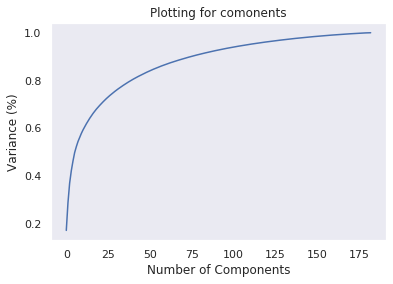

In [93]:
#Fitting the PCA algorithm with our Data
from sklearn.decomposition import PCA

pca = PCA().fit(Gene_Exp)

#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid()
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Plotting for comonents')
plt.show()

#### 95% of variance is coverd just by nearly 100 principal components

In [0]:
#applying pca to dataset
n_components = 140
pca = PCA(n_components)
df = pca.fit_transform(Gene_Exp)

In [0]:
#placing column name and generating dataframe
df_transformed = pd.DataFrame(df , columns=['PCA'+str(i) for i in range(1,n_components+1)],index=None)

In [96]:
df_transformed.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14,PCA15,PCA16,PCA17,PCA18,PCA19,PCA20,PCA21,PCA22,PCA23,PCA24,PCA25,PCA26,PCA27,PCA28,PCA29,PCA30,PCA31,PCA32,PCA33,PCA34,PCA35,PCA36,PCA37,PCA38,PCA39,PCA40,...,PCA101,PCA102,PCA103,PCA104,PCA105,PCA106,PCA107,PCA108,PCA109,PCA110,PCA111,PCA112,PCA113,PCA114,PCA115,PCA116,PCA117,PCA118,PCA119,PCA120,PCA121,PCA122,PCA123,PCA124,PCA125,PCA126,PCA127,PCA128,PCA129,PCA130,PCA131,PCA132,PCA133,PCA134,PCA135,PCA136,PCA137,PCA138,PCA139,PCA140
0,3.746772,-2.269537,0.203784,-2.514357,2.965409,-3.420530,1.776830,-0.870073,3.676253,-1.126779,-1.650932,-2.523422,0.046377,-1.981521,0.941870,0.172377,0.953375,-1.696780,1.349318,-1.751161,-1.319298,-1.383076,1.350157,-1.088452,-0.798139,-1.232669,1.749166,0.470335,-0.208406,1.758313,2.000501,0.897202,0.214239,0.996866,0.036970,-0.399469,-1.654714,2.060541,-0.742778,0.002595,...,-1.131357,-0.755955,1.243410,0.024016,-0.311344,1.137145,0.569218,-0.156021,1.081706,-0.416217,-0.446276,-0.181779,0.494919,-0.491069,1.094726,0.467546,1.088736,0.402940,-1.474375,-0.042838,0.002060,0.478430,-0.702263,-0.928868,0.293273,-1.133510,-0.382513,-0.116214,0.009350,-0.466672,0.029972,-0.077720,1.042139,0.206521,0.809048,-0.762021,0.628294,-0.070407,0.837674,-1.929639
1,0.923861,-2.285517,0.250446,-3.019130,0.220536,-4.143518,-0.703382,-0.571236,0.374976,-2.185964,-2.066979,1.646014,-1.556065,1.759846,0.770875,3.986188,3.225372,0.093231,-1.866132,-0.924275,-1.104045,-0.521559,1.071000,-1.415309,1.759298,-2.268846,-2.815453,0.913835,0.145869,-0.751876,1.012010,-0.206040,1.244289,-0.447929,-1.527058,-0.684168,-1.302290,-0.553166,0.313504,-0.991687,...,0.756745,0.067935,0.066367,-0.670885,0.232102,-1.215281,0.042368,-0.140153,0.033852,-0.181459,-0.370869,1.778935,-0.060733,1.481560,1.584408,0.117021,0.752792,0.369963,1.002741,0.370875,0.428809,-1.250954,-1.320413,-0.409695,0.124375,0.458130,-0.032396,0.731983,-0.578614,-0.298733,-0.823829,-0.874759,-0.338254,-0.801402,0.254596,1.049208,0.758026,0.049409,-1.008462,0.063962
2,4.806901,-4.426185,-2.457422,5.213659,-8.753058,1.885591,-1.859092,-0.122832,-1.131751,-0.054025,-1.670539,1.996083,-1.808349,0.431470,-4.882251,1.973115,-0.600162,0.728906,-4.685415,-4.894699,1.519846,0.413662,0.534021,1.171215,1.259587,-0.460823,-3.152848,1.951658,-1.183821,-0.379780,-1.550125,4.344517,-2.792695,2.474071,-1.794052,1.793498,1.464737,2.093987,-2.173857,1.645045,...,0.296986,-0.090387,1.085116,0.205540,-0.697387,-0.546297,-0.220579,-0.160613,-0.879692,-0.182548,0.525519,0.064278,-0.457588,-0.100931,-0.304219,-0.071489,-0.635933,0.358070,0.372222,-0.222132,-0.312661,-0.088177,0.110092,-0.148374,-0.647284,0.358281,0.179254,0.139973,0.132428,0.000894,0.216387,-0.346036,-0.241160,-0.047181,0.273145,-0.194946,-0.349856,-0.176094,-0.009453,0.333348
3,0.040738,-4.033628,0.217889,-0.897112,-1.001465,0.398721,-2.031056,-2.822393,-2.591192,1.928649,4.365460,-1.076745,1.732154,-0.056725,1.599855,-0.727935,0.217249,1.851218,0.292770,-1.244808,-0.927368,0.284113,-1.438375,-0.229671,-0.765156,0.891372,-0.908476,-0.182667,1.865621,-0.025731,0.692292,1.207685,-0.597245,-0.113605,-0.284786,0.282921,-3.088508,-0.746802,0.620970,2.259416,...,0.689733,-0.082165,0.717501,-0.524852,0.456971,-1.043335,-0.063965,-0.782948,0.595285,-0.627280,0.445535,1.993894,0.453880,-0.331692,-1.519396,-0.259872,0.479529,-0.577512,-0.974118,-0.187022,-0.878779,-0.052038,0.441525,-0.032189,-0.086187,0.705778,-0.232239,0.038045,-0.400406,0.174591,0.387048,0.041788,0.337381,-0.218083,-0.939554,0.415608,0.827985,-1.311339,-0.856207,-0.031569
4,-0.092549,0.673299,-3.240601,1.013516,0.510650,-2.434991,0.677320,3.804251,-0.473603,-0.014403,-1.570577,-0.741576,-0.724271,0.410512,-0.134663,-0.121131,-1.153631,-0.764001,1.293983,-0.209466,0.612174,-0.472899,1.500852,0.141501,-0.505217,-0.781141,-0.145970,0.708732,0.553829,-0.013456,-0.563494,0.553983,0.608369,-0.218562,0.982665,-0.452371,-1.306527,-0.582516,1.028277,0.702991,...,0.089379,-0.311820,-0.

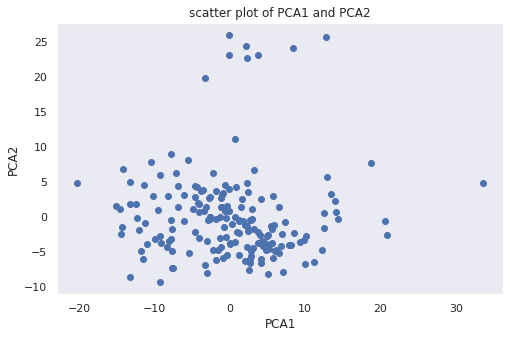

In [97]:
#scatter plot pca1 and pca2
plt.figure(figsize=(8,5))
plt.scatter(df_transformed['PCA1'], df_transformed['PCA2'])
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('scatter plot of PCA1 and PCA2')
plt.grid()
plt.show()

In [0]:
df_copy = df_transformed.copy()

In [99]:
df_copy.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14,PCA15,PCA16,PCA17,PCA18,PCA19,PCA20,PCA21,PCA22,PCA23,PCA24,PCA25,PCA26,PCA27,PCA28,PCA29,PCA30,PCA31,PCA32,PCA33,PCA34,PCA35,PCA36,PCA37,PCA38,PCA39,PCA40,...,PCA101,PCA102,PCA103,PCA104,PCA105,PCA106,PCA107,PCA108,PCA109,PCA110,PCA111,PCA112,PCA113,PCA114,PCA115,PCA116,PCA117,PCA118,PCA119,PCA120,PCA121,PCA122,PCA123,PCA124,PCA125,PCA126,PCA127,PCA128,PCA129,PCA130,PCA131,PCA132,PCA133,PCA134,PCA135,PCA136,PCA137,PCA138,PCA139,PCA140
0,3.746772,-2.269537,0.203784,-2.514357,2.965409,-3.420530,1.776830,-0.870073,3.676253,-1.126779,-1.650932,-2.523422,0.046377,-1.981521,0.941870,0.172377,0.953375,-1.696780,1.349318,-1.751161,-1.319298,-1.383076,1.350157,-1.088452,-0.798139,-1.232669,1.749166,0.470335,-0.208406,1.758313,2.000501,0.897202,0.214239,0.996866,0.036970,-0.399469,-1.654714,2.060541,-0.742778,0.002595,...,-1.131357,-0.755955,1.243410,0.024016,-0.311344,1.137145,0.569218,-0.156021,1.081706,-0.416217,-0.446276,-0.181779,0.494919,-0.491069,1.094726,0.467546,1.088736,0.402940,-1.474375,-0.042838,0.002060,0.478430,-0.702263,-0.928868,0.293273,-1.133510,-0.382513,-0.116214,0.009350,-0.466672,0.029972,-0.077720,1.042139,0.206521,0.809048,-0.762021,0.628294,-0.070407,0.837674,-1.929639
1,0.923861,-2.285517,0.250446,-3.019130,0.220536,-4.143518,-0.703382,-0.571236,0.374976,-2.185964,-2.066979,1.646014,-1.556065,1.759846,0.770875,3.986188,3.225372,0.093231,-1.866132,-0.924275,-1.104045,-0.521559,1.071000,-1.415309,1.759298,-2.268846,-2.815453,0.913835,0.145869,-0.751876,1.012010,-0.206040,1.244289,-0.447929,-1.527058,-0.684168,-1.302290,-0.553166,0.313504,-0.991687,...,0.756745,0.067935,0.066367,-0.670885,0.232102,-1.215281,0.042368,-0.140153,0.033852,-0.181459,-0.370869,1.778935,-0.060733,1.481560,1.584408,0.117021,0.752792,0.369963,1.002741,0.370875,0.428809,-1.250954,-1.320413,-0.409695,0.124375,0.458130,-0.032396,0.731983,-0.578614,-0.298733,-0.823829,-0.874759,-0.338254,-0.801402,0.254596,1.049208,0.758026,0.049409,-1.008462,0.063962
2,4.806901,-4.426185,-2.457422,5.213659,-8.753058,1.885591,-1.859092,-0.122832,-1.131751,-0.054025,-1.670539,1.996083,-1.808349,0.431470,-4.882251,1.973115,-0.600162,0.728906,-4.685415,-4.894699,1.519846,0.413662,0.534021,1.171215,1.259587,-0.460823,-3.152848,1.951658,-1.183821,-0.379780,-1.550125,4.344517,-2.792695,2.474071,-1.794052,1.793498,1.464737,2.093987,-2.173857,1.645045,...,0.296986,-0.090387,1.085116,0.205540,-0.697387,-0.546297,-0.220579,-0.160613,-0.879692,-0.182548,0.525519,0.064278,-0.457588,-0.100931,-0.304219,-0.071489,-0.635933,0.358070,0.372222,-0.222132,-0.312661,-0.088177,0.110092,-0.148374,-0.647284,0.358281,0.179254,0.139973,0.132428,0.000894,0.216387,-0.346036,-0.241160,-0.047181,0.273145,-0.194946,-0.349856,-0.176094,-0.009453,0.333348
3,0.040738,-4.033628,0.217889,-0.897112,-1.001465,0.398721,-2.031056,-2.822393,-2.591192,1.928649,4.365460,-1.076745,1.732154,-0.056725,1.599855,-0.727935,0.217249,1.851218,0.292770,-1.244808,-0.927368,0.284113,-1.438375,-0.229671,-0.765156,0.891372,-0.908476,-0.182667,1.865621,-0.025731,0.692292,1.207685,-0.597245,-0.113605,-0.284786,0.282921,-3.088508,-0.746802,0.620970,2.259416,...,0.689733,-0.082165,0.717501,-0.524852,0.456971,-1.043335,-0.063965,-0.782948,0.595285,-0.627280,0.445535,1.993894,0.453880,-0.331692,-1.519396,-0.259872,0.479529,-0.577512,-0.974118,-0.187022,-0.878779,-0.052038,0.441525,-0.032189,-0.086187,0.705778,-0.232239,0.038045,-0.400406,0.174591,0.387048,0.041788,0.337381,-0.218083,-0.939554,0.415608,0.827985,-1.311339,-0.856207,-0.031569
4,-0.092549,0.673299,-3.240601,1.013516,0.510650,-2.434991,0.677320,3.804251,-0.473603,-0.014403,-1.570577,-0.741576,-0.724271,0.410512,-0.134663,-0.121131,-1.153631,-0.764001,1.293983,-0.209466,0.612174,-0.472899,1.500852,0.141501,-0.505217,-0.781141,-0.145970,0.708732,0.553829,-0.013456,-0.563494,0.553983,0.608369,-0.218562,0.982665,-0.452371,-1.306527,-0.582516,1.028277,0.702991,...,0.089379,-0.311820,-0.

In [100]:
df_copy.shape

(183, 140)

In [101]:
Gene_Info.shape

(2, 183)

In [102]:
Gene_Info.head()

cid,aab1-Primary solid Tumor,aab4-Primary solid Tumor,aab6-Primary solid Tumor,aab8-Primary solid Tumor,aab9-Primary solid Tumor,aaba-Primary solid Tumor,aabe-Primary solid Tumor,aabf-Primary solid Tumor,aabh-Primary solid Tumor,aabi-Primary solid Tumor,aabk-Primary solid Tumor,aabo-Primary solid Tumor,aabp-Primary solid Tumor,aabr-Primary solid Tumor,aabt-Primary solid Tumor,aabu-Primary solid Tumor,aabv-Primary solid Tumor,aaqa-Primary solid Tumor,aaqe-Primary solid Tumor,aaqi-Primary solid Tumor,aaqj-Primary solid Tumor,aaql-Primary solid Tumor,aaqm-Primary solid Tumor,a9i5-Primary solid Tumor,a9i7-Primary solid Tumor,a9i9-Primary solid Tumor,a9ib-Primary solid Tumor,a9ic-Primary solid Tumor,a9ih-Primary solid Tumor,a9ij-Primary solid Tumor,a9il-Primary solid Tumor,a9in-Primary solid Tumor,a9io-Primary solid Tumor,a9ir-Primary solid Tumor,a9is-Primary solid Tumor,a9iu-Primary solid Tumor,a9iv-Primary solid Tumor,a9ix-Primary solid Tumor,a9iz-Primary solid Tumor,a9j0-Primary solid Tumor,...,aaup-Primary solid Tumor,aauq-Primary solid Tumor,aaur-Primary solid Tumor,aaus-Primary solid Tumor,aaut-Primary solid Tumor,aauu-Primary solid Tumor,aauv-Primary solid Tumor,aauw-Primary solid Tumor,a7w4-Primary solid Tumor,a7sx-Primary solid Tumor,a8f3-Primary solid Tumor,a9q5-Primary solid Tumor,a5n4-Primary solid Tumor,a75w-Primary solid Tumor,a5re-Primary solid Tumor,a5qy-Primary solid Tumor,aa2a-Primary solid Tumor,a7b8-Primary solid Tumor,aa9m-Primary solid Tumor,aaas-Primary solid Tumor,a8rm-Primary solid Tumor,a8ro-Primary solid Tumor,a8rp-Primary solid Tumor,a774-Primary solid Tumor,a776-Primary solid Tumor,a779-Primary solid Tumor,a77e-Primary solid Tumor,a77g-Primary solid Tumor,a77j-Primary solid Tumor,aaug-Primary solid Tumor,aauh-Primary solid Tumor,aaui-Primary solid Tumor,aaul-Primary solid Tumor,a8t3-Primary solid Tumor,a8t5-Primary solid Tumor,a89d-Solid Tissue Normal,a89d-Primary solid Tumor,a8sy-Primary solid Tumor,a8lh-Primary solid Tumor,aapl-Primary solid Tumor
chd,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
histological_type_other,invasive adenocarcinoma,"invasive, well-differentiated","adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos",invasive adenocarcinoma,poorly differentiated adenocarcinoma,"adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos",neuroendocrine,"adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos",neuroendocrine carcinoma nos,neuroendocrine carcinoma nos,neuroendocrine carcinoma nos,neuroendocrine carcinoma nos,neuroendocrine carcinoma nos,82463 neuroendocrine carcinoma nos,"adenocarcinoma, nos",neuroendocrine carcinoma,"adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos",...,"adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos",ductal and micropapillary,"adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos",adenocarcinoma- nos,"adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos",moderately differentiated ductal adenocarcinom...,"adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos","adenocarcinoma, nos"
histological_typ

In [0]:
#appending expressinal label to data
df_copy['label1'] = list(Gene_Info.iloc[0])
df_copy['label2'] = list(Gene_Info.iloc[1])

In [104]:
df_copy.head(5)

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14,PCA15,PCA16,PCA17,PCA18,PCA19,PCA20,PCA21,PCA22,PCA23,PCA24,PCA25,PCA26,PCA27,PCA28,PCA29,PCA30,PCA31,PCA32,PCA33,PCA34,PCA35,PCA36,PCA37,PCA38,PCA39,PCA40,...,PCA103,PCA104,PCA105,PCA106,PCA107,PCA108,PCA109,PCA110,PCA111,PCA112,PCA113,PCA114,PCA115,PCA116,PCA117,PCA118,PCA119,PCA120,PCA121,PCA122,PCA123,PCA124,PCA125,PCA126,PCA127,PCA128,PCA129,PCA130,PCA131,PCA132,PCA133,PCA134,PCA135,PCA136,PCA137,PCA138,PCA139,PCA140,label1,label2
0,3.746772,-2.269537,0.203784,-2.514357,2.965409,-3.420530,1.776830,-0.870073,3.676253,-1.126779,-1.650932,-2.523422,0.046377,-1.981521,0.941870,0.172377,0.953375,-1.696780,1.349318,-1.751161,-1.319298,-1.383076,1.350157,-1.088452,-0.798139,-1.232669,1.749166,0.470335,-0.208406,1.758313,2.000501,0.897202,0.214239,0.996866,0.036970,-0.399469,-1.654714,2.060541,-0.742778,0.002595,...,1.243410,0.024016,-0.311344,1.137145,0.569218,-0.156021,1.081706,-0.416217,-0.446276,-0.181779,0.494919,-0.491069,1.094726,0.467546,1.088736,0.402940,-1.474375,-0.042838,0.002060,0.478430,-0.702263,-0.928868,0.293273,-1.133510,-0.382513,-0.116214,0.009350,-0.466672,0.029972,-0.077720,1.042139,0.206521,0.809048,-0.762021,0.628294,-0.070407,0.837674,-1.929639,invasive adenocarcinoma,pancreas-adenocarcinoma-other subtype
1,0.923861,-2.285517,0.250446,-3.019130,0.220536,-4.143518,-0.703382,-0.571236,0.374976,-2.185964,-2.066979,1.646014,-1.556065,1.759846,0.770875,3.986188,3.225372,0.093231,-1.866132,-0.924275,-1.104045,-0.521559,1.071000,-1.415309,1.759298,-2.268846,-2.815453,0.913835,0.145869,-0.751876,1.012010,-0.206040,1.244289,-0.447929,-1.527058,-0.684168,-1.302290,-0.553166,0.313504,-0.991687,...,0.066367,-0.670885,0.232102,-1.215281,0.042368,-0.140153,0.033852,-0.181459,-0.370869,1.778935,-0.060733,1.481560,1.584408,0.117021,0.752792,0.369963,1.002741,0.370875,0.428809,-1.250954,-1.320413,-0.409695,0.124375,0.458130,-0.032396,0.731983,-0.578614,-0.298733,-0.823829,-0.874759,-0.338254,-0.801402,0.254596,1.049208,0.758026,0.049409,-1.008462,0.063962,"invasive, well-differentiated",pancreas-adenocarcinoma-other subtype
2,4.806901,-4.426185,-2.457422,5.213659,-8.753058,1.885591,-1.859092,-0.122832,-1.131751,-0.054025,-1.670539,1.996083,-1.808349,0.431470,-4.882251,1.973115,-0.600162,0.728906,-4.685415,-4.894699,1.519846,0.413662,0.534021,1.171215,1.259587,-0.460823,-3.152848,1.951658,-1.183821,-0.379780,-1.550125,4.344517,-2.792695,2.474071,-1.794052,1.793498,1.464737,2.093987,-2.173857,1.645045,...,1.085116,0.205540,-0.697387,-0.546297,-0.220579,-0.160613,-0.879692,-0.182548,0.525519,0.064278,-0.457588,-0.100931,-0.304219,-0.071489,-0.635933,0.358070,0.372222,-0.222132,-0.312661,-0.088177,0.110092,-0.148374,-0.647284,0.358281,0.179254,0.139973,0.132428,0.000894,0.216387,-0.346036,-0.241160,-0.047181,0.273145,-0.194946,-0.349856,-0.176094,-0.009453,0.333348,"adenocarcinoma, nos",pancreas-adenocarcinoma ductal type
3,0.040738,-4.033628,0.217889,-0.897112,-1.001465,0.398721,-2.031056,-2.822393,-2.591192,1.928649,4.365460,-1.076745,1.732154,-0.056725,1.599855,-0.727935,0.217249,1.851218,0.292770,-1.244808,-0.927368,0.284113,-1.438375,-0.229671,-0.765156,0.891372,-0.908476,-0.182667,1.865621,-0.025731,0.692292,1.207685,-0.597245,-0.113605,-0.284786,0.282921,-3.088508,-0.746802,0.620970,2.259416,...,0.717501,-0.524852,0.456971,-1.043335,-0.063965,-0.782948,0.595285,-0.627280,0.445535,1.993894,0.453880,-0.331692,-1.519396,-0.259872,0.479529,-0.577512,-0.974118,-0.187022,-0.878779,-0.052038,0.441525,-0.032189,-0.086187,0.705778,-0.232239,0.038045,-0.400406,0.174591,0.387048,0.041788,0.337381,-0.218083,-0.939554,0.415608,0.827985,-1.311339,-0.856207,-0.031569,"adenocarcinoma, nos",pancreas-adenocarcinoma ductal type
4,-0.092549,0.673299,-3.240601,1.013516,0.510650,-2.434991,0.677320,3.804251,-0.473603,-0.014403,-1.570577,-0.741576,-0.724271,0.410512,-0.134663,-0.121131,-1.153631,-0.764001,1.293983,-0.209466,0.612174,-0.472899,1.500852,0.141501,-0.5052

In [105]:
# Checking unique values.
df_copy['label1'].value_counts()

adenocarcinoma, nos                                                         164
neuroendocrine carcinoma nos                                                  5
poorly differentiated pancreatic adenocarcinoma                               2
invasive adenocarcinoma                                                       2
not specified                                                                 1
neuroendocrine carcinoma                                                      1
neuroendocrine                                                                1
adenocarcinoma- nos                                                           1
invasive, well-differentiated                                                 1
82463 neuroendocrine carcinoma nos                                            1
ductal and micropapillary                                                     1
poorly differentiated adenocarcinoma                                          1
moderately differentiated ductal adenoca

In [106]:
df_copy['label2'].value_counts()

pancreas-adenocarcinoma ductal type                 151
pancreas-adenocarcinoma-other subtype                27
pancreas-colloid (mucinous non-cystic) carcinoma      4
pancreas-undifferentiated carcinoma                   1
Name: label2, dtype: int64

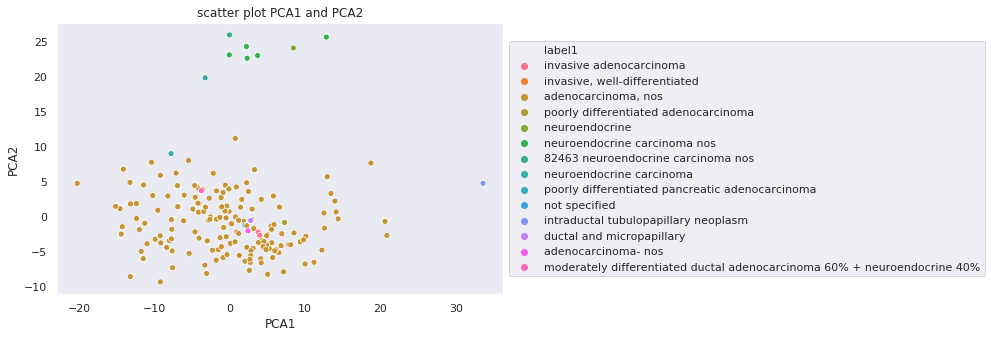

In [107]:
# Scatter plot of PCA1 and PCA2 and overlaying the info of label1(neuroendocrine)
plt.figure(figsize=(8,5))
ax=sns.scatterplot(df_copy['PCA1'],df_copy['PCA2'],hue = df_copy['label1'])
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('scatter plot PCA1 and PCA2')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.show()

**Ans 2.A : Neuroendocrine have more variance along principal component 2 while adenocarcinoma have more variance along principal component 1**

**Ans 2.B : Yes, Adenocarcinoma are clearly separable from neuroendocrine tumors using 2 principal components.**

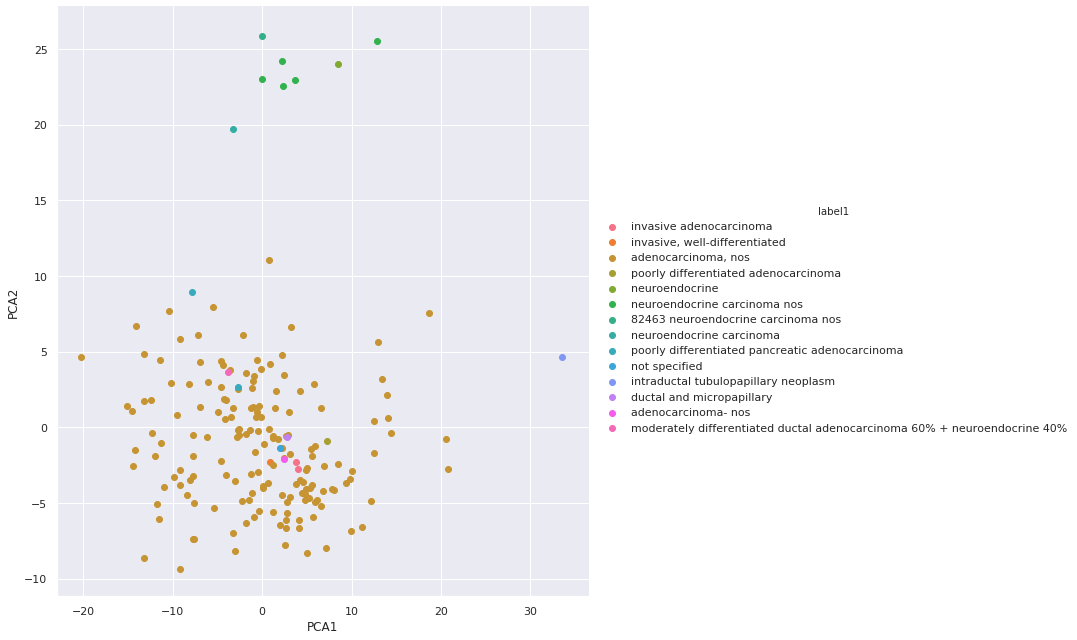

In [108]:
g =sns.FacetGrid(df_copy,hue='label1',height=9)
g.map(plt.scatter,'PCA1', 'PCA2').add_legend()
plt.show()

**Ans 2.C : 97% of the varance is retained.**